In [1]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
print(tf.__version__)
print(tf.keras.__version__)

2.12.0
2.12.0


## Download and check data

First we download Cork's weather data hly3904 from the relevant website https://cli.fusio.net/cli/climate_data/webdata/hly3904.csv, and give the file name hly3904.csv.

In [2]:
csv_path = tf.keras.utils.get_file(
    origin='https://cli.fusio.net/cli/climate_data/webdata/hly3904.csv',
    fname='hly3904.csv',
    extract=True)

When I read the relevant data in the file, I noted that from the file that the first 23 lines are the explanation of the abbreviated names of the data. We don't need this part of the information, so I use skiprows to skip this part and read the useful data directly.

In [3]:
df = pd.read_csv(csv_path, skiprows= 23,low_memory=False)
date_time = pd.to_datetime(df.pop('date'), format='%d-%b-%Y %H:%M')

Use df.head() to see different data represent information in the first rows.

In [4]:
df.head()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,8,,0,-1.1,0,-1.3,-1.6,5.3,94,1016.0,1,14,1,340,2,0,,30000,999,2
1,8,,0,-1.1,0,-1.3,-1.6,5.3,94,1016.5,1,10,1,340,3,1,,30000,20,7
2,8,,0,-1.0,0,-1.2,-1.6,5.3,94,1016.7,1,12,1,320,1,1,,30000,999,3
3,8,,0,-1.6,0,-1.8,-2.2,5.1,94,1017.2,1,8,1,330,1,0,,30000,999,1
4,8,,0,-2.1,0,-2.3,-3.3,4.8,93,1018.0,1,11,1,320,1,0,,30000,999,0


Delete useless data ind, ind.1, ind.2, ind.3, ind.4 in dataset.

In [6]:
df =df.drop(columns=['ind', 'ind.1','ind.2','ind.3','ind.4'])

Check the data in the dataset again.

In [46]:
df = df.fillna(0)
df

,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,ww,w,sun,vis,clht,clamt
0,0.0,-1.1,-1.3,-1.6,5.3,94.0,1016.0,14.0,340.0,2.0,0.0,0.0,30000.0,0.0,2.0
1,0.0,-1.1,-1.3,-1.6,5.3,94.0,1016.5,10.0,340.0,3.0,1.0,0.0,30000.0,20.0,7.0
2,0.0,-1.0,-1.2,-1.6,5.3,94.0,1016.7,12.0,320.0,1.0,1.0,0.0,30000.0,0.0,3.0
3,0.0,-1.6,-1.8,-2.2,5.1,94.0,1017.2,8.0,330.0,1.0,0.0,0.0,30000.0,0.0,1.0
4,0.0,-2.1,-2.3,-3.3,4.8,93.0,1018.0,11.0,320.0,1.0,0.0,0.0,30000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536875,0.0,9.2,8.0,6.7,9.8,84.0,1003.1,10.0,280.0,2.0,11.0,0.0,35000.0,200.0,4.0
536876,0.0,8.5,7.4,6.1,9.4,85.0,1004.0,10.0,260.0,2.0,11.0,0.0,35000.0,0.0,1.0
536877,0.0,7.2,6.4,5.4,9.0,88.0,1004.7,7.0,250.0,2.0,11.0,0.0,35000.0,0.0,1.0
536878,0.0,7.3,6.7,6.0,9.3,91.0,1005.2,8.0,260.0,2.0,11.0,0.0,35000.0,200.0,4.0


In [47]:
df.dtypes

rain     float64
temp     float64
wetb     float64
dewpt    float64
vappr    float64
rhum     float64
msl      float64
wdsp     float64
wddir    float64
ww       float64
w        float64
sun      float64
vis      float64
clht     float64
clamt    float64
dtype: object

Use interpolate and astype convert all data in the dataset to float64.

In [48]:
df['wetb'] = pd.to_numeric(df['wetb'], errors ='coerce')
df['vappr'] = pd.to_numeric(df['vappr'], errors ='coerce')
df['rhum'] = pd.to_numeric(df['rhum'], errors ='coerce')
df['vis'] = pd.to_numeric(df['vis'], errors ='coerce')
df['sun'] = pd.to_numeric(df['sun'], errors ='coerce')
df['clht'] = pd.to_numeric(df['clht'], errors ='coerce')
df['clamt'] = pd.to_numeric(df['clamt'], errors ='coerce')
df['rain'] = pd.to_numeric(df['rain'], errors ='coerce')

df['wetb'] = df['wetb'].interpolate(method='cubic')
df['vappr'] = df['vappr'].interpolate(method='cubic')
df['rhum'] = df['rhum'].interpolate(method='cubic')
df['vis'] = df['vis'].interpolate(method='cubic')


df['wdsp'] = df['wdsp'].astype(float)
df['wddir'] = df['wddir'].astype(float)
df['ww'] = df['ww'].astype(float)
df['w'] = df['w'].astype(float)

df.dtypes

rain     float64
temp     float64
wetb     float64
dewpt    float64
vappr    float64
rhum     float64
msl      float64
wdsp     float64
wddir    float64
ww       float64
w        float64
sun      float64
vis      float64
clht     float64
clamt    float64
dtype: object

Plot different features over time, here are hourly and yearly changes in rainfall, temperature and mean sea level pressure from 1992 to 2022.

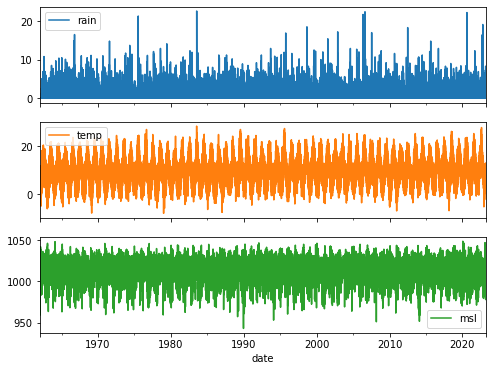

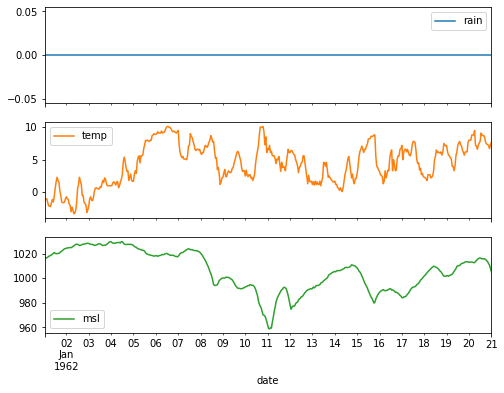

In [49]:
plot_cols = ['rain', 'temp', 'msl']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

look at the statistics of the dataset:

In [50]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rain,536880.0,0.139038,0.566825,0.000000,0.0,0.0,0.0,22.6
temp,536880.0,9.654209,4.510928,-8.000000,6.5,9.7,12.9,28.4
wetb,536880.0,8.518680,4.308039,-49.000000,5.5,8.8,11.7,22.0
dewpt,536880.0,7.267548,4.521922,-17.700000,4.0,7.7,10.6,20.5
vappr,536880.0,10.620737,3.175038,1.800000,8.1,10.4,12.8,79.0
rhum,536880.0,85.906184,11.787073,15.000000,79.0,89.0,95.0,760.0
msl,536880.0,1014.486259,12.143148,942.800000,1007.2,1015.9,1023.0,1048.9
wdsp,536880.0,10.362565,5.655356,0.000000,6.0,9.0,14.0,56.0
wddir,536880.0,216.918157,89.618372,0.000000,160.0,230.0,290.0,360.0
ww,536880.0,17.111653,23.472695,0.000000,2.0,2.0,25.0,99.0


Observe the number of items in the data set, the mean, variance, and the minimum and maximum values to see if there are obvious data errors. You can see from the table that the data is acceptable.

In [51]:
wv = df['clht']
bad_wv = wv == 999.0
wv[bad_wv] = 0.0

# The above inplace edits are reflected in the DataFrame.
df['clht'].min()

0.0

Analyze the distribution of wind data.

Text(0, 0.5, 'Mean Wind Speed [knot]')

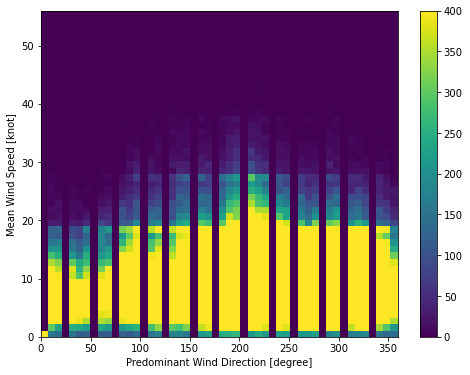

In [52]:
plt.hist2d(df['wddir'], df['wdsp'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Predominant Wind Direction [degree]')
plt.ylabel('Mean Wind Speed [knot]')

Obtain a usable signal by clearing the Time of Day and Time of Year signals using sine and cosine transforms.

In [53]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))


Using the sin and cos functions to give the time of day and the time of year, the surface weather conditions will change periodically.

Text(0.5, 1.0, 'Time of day signal')

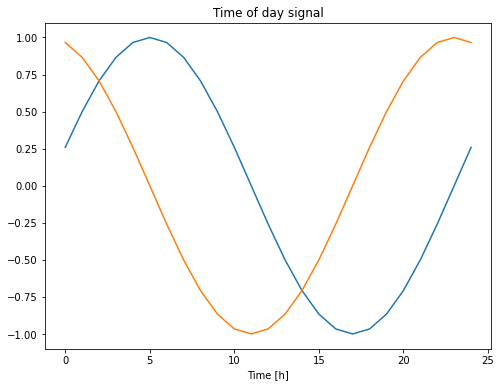

In [54]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

clear the data, drop 'Day sin', 'Day cos','Year sin','Year cos'.

In [55]:
df =df.drop(columns=['Day sin', 'Day cos','Year sin','Year cos'])
df

,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,ww,w,sun,vis,clht,clamt
0,0.0,-1.1,-1.3,-1.6,5.3,94.0,1016.0,14.0,340.0,2.0,0.0,0.0,30000.0,0.0,2.0
1,0.0,-1.1,-1.3,-1.6,5.3,94.0,1016.5,10.0,340.0,3.0,1.0,0.0,30000.0,20.0,7.0
2,0.0,-1.0,-1.2,-1.6,5.3,94.0,1016.7,12.0,320.0,1.0,1.0,0.0,30000.0,0.0,3.0
3,0.0,-1.6,-1.8,-2.2,5.1,94.0,1017.2,8.0,330.0,1.0,0.0,0.0,30000.0,0.0,1.0
4,0.0,-2.1,-2.3,-3.3,4.8,93.0,1018.0,11.0,320.0,1.0,0.0,0.0,30000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536875,0.0,9.2,8.0,6.7,9.8,84.0,1003.1,10.0,280.0,2.0,11.0,0.0,35000.0,200.0,4.0
536876,0.0,8.5,7.4,6.1,9.4,85.0,1004.0,10.0,260.0,2.0,11.0,0.0,35000.0,0.0,1.0
536877,0.0,7.2,6.4,5.4,9.0,88.0,1004.7,7.0,250.0,2.0,11.0,0.0,35000.0,0.0,1.0
536878,0.0,7.3,6.7,6.0,9.3,91.0,1005.2,8.0,260.0,2.0,11.0,0.0,35000.0,200.0,4.0


Extract features using Fast Fourier Transform to determine which frequencies are important. This plot is a characteristic of the frequency of temperature change over time, which is close to the apparent peaks of 1/year and 1/day.

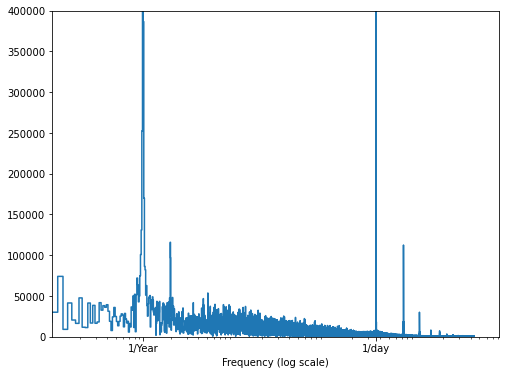

In [56]:
fft = tf.signal.rfft(df['temp'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['temp'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

## Data preprocessing

After understanding some characteristics of the data, start data preprocessing to get good data to prepare for input into the model. First use (70%, 20%, 10%) splits on training, validation and test sets and make sure the data is not randomly shuffled before splitting. This is because I want to make sure that it is still possible to cut the data into windows of consecutive samples, while keeping the validation/test results more realistic and evaluated against the data collected after the model is trained.

In [57]:
column_indices = {name: i for i, name in enumerate(df.columns)}
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

Normalizing the data, normalization is a common way to do scaling: subtract the mean and divide by the standard deviation of each feature.

In [58]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [59]:
train_df

,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,ww,w,sun,vis,clht,clamt
0,-0.24203,-2.365751,-2.309505,-1.929291,-1.657411,0.714007,0.123624,0.567309,1.344099,-0.653049,-0.684275,-0.498765,0.358836,-0.592551,-1.561560
1,-0.24203,-2.365751,-2.309505,-1.929291,-1.657411,0.714007,0.164866,-0.115256,1.344099,-0.610783,-0.644880,-0.498765,0.358836,-0.214213,0.468374
2,-0.24203,-2.343559,-2.285759,-1.929291,-1.657411,0.714007,0.181362,0.226026,1.125115,-0.695315,-0.644880,-0.498765,0.358836,-0.592551,-1.155573
3,-0.24203,-2.476709,-2.428232,-2.061681,-1.720806,0.714007,0.222603,-0.456538,1.234607,-0.695315,-0.684275,-0.498765,0.358836,-0.592551,-1.967547
4,-0.24203,-2.587666,-2.546959,-2.304395,-1.815898,0.628440,0.288589,0.055385,1.125115,-0.695315,-0.684275,-0.498765,0.358836,-0.592551,-2.373534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375811,-0.24203,-0.767962,-0.623583,-0.406812,-0.484607,0.799573,1.806268,-0.797821,0.139687,-0.653049,-0.250925,-0.498765,0.358836,0.069541,0.468374
375812,-0.24203,-0.878919,-0.742309,-0.517137,-0.579699,0.799573,1.806268,-0.627179,0.139687,-0.653049,-0.250925,-0.498765,0.358836,-0.006127,0.468374
375813,-0.24203,-0.901111,-0.766055,-0.517137,-0.611396,0.799573,1.781524,-0.797821,0.139687,-0.653049,-0.250925,-0.498765,0.358836,-0.157462,0.468374
375814,-0.24203,-1.034260,-0.908527,-0.627461,-0.738186,0.799573,1.732034,-0.797821,0.249179,0.107742,1.364290,-0.498765,-0.797230,-0.327714,0.468374


By using violinplot to check the distribution of features to see which features have long tails.

In [60]:
df_std = (df - train_mean) / train_std
#df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(16, 9),dpi=800)
ax = sns.violinplot(data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

As we can see, dataset wddir have a long tail.

## Data windowing

Set up a window to make predictions for each successive set of data. First I create a Window Generator class that takes as input the train, evaluation, and test data.

In [61]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

### step 1 : Create window

Create window 1 to make a single forecast 24 hours into the future, given 24 hours of history.

In [62]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['temp'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['temp']

Create window 2 to make a prediction one hour into the future, given six hours of history.

In [63]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['temp'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['temp']

### step 2 : Split window

Use the split_window method to convert the input list into an input window and a window of labels.

In [64]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [65]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 15)
Inputs shape: (3, 6, 15)
Labels shape: (3, 1, 1)


As we can see in the window, The code above took a batch of three 7-time step windows with 15 features at each time step.The label only has one feature because the WindowGenerator was initialized with label_columns=[' temp ']. Initially, this tutorial will build models that predict single output labels.

### step 3 : Plot

In [66]:
w2.example = example_inputs, example_labels

In [67]:
def plot(self, model=None, plot_col='temp', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)
    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

Visualize the split windows:

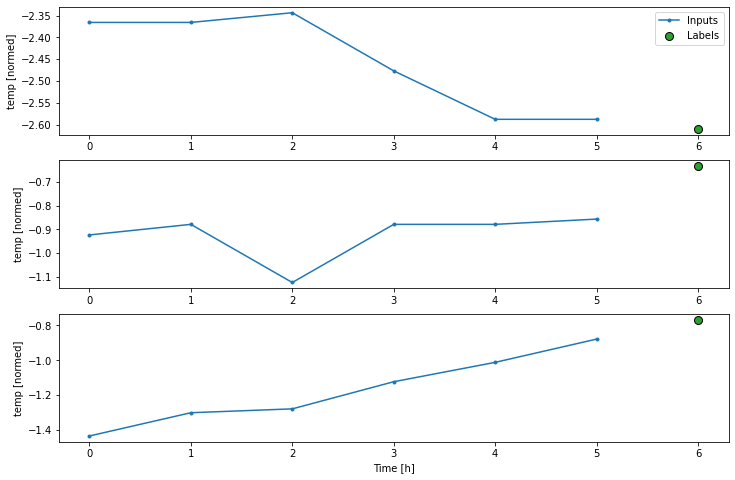

In [68]:
w2.plot()

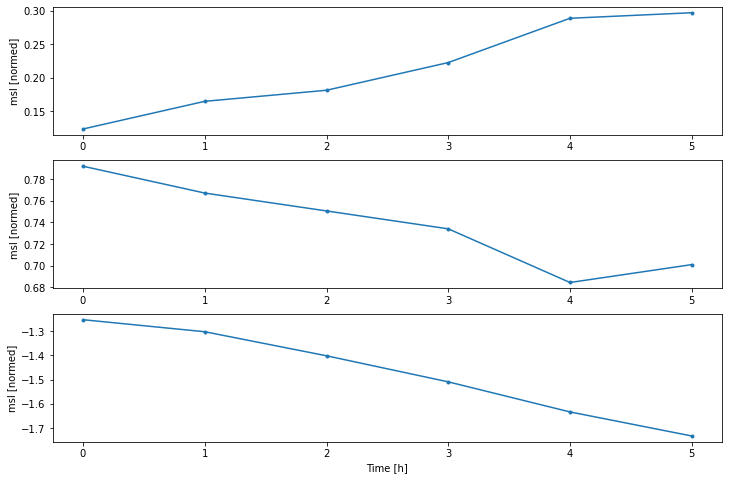

In [69]:
w2.plot(plot_col='msl')

###  step 4 :Create tf.data.Datasets

Use make_dataset method take a time series DataFrame and convert it to a tf.data.Dataset of (input_window, label_window) pairs using the tf.keras.utils.timeseries_dataset_from_array function:

In [70]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

Add properties for accessing them as tf.data.Datasets using the make_dataset method and add a standard example batch for easy access and plotting.

In [71]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

Check structure, data types, and shapes of the dataset elements:

In [72]:
w2.train.element_spec

(TensorSpec(shape=(None, 6, 15), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

Iterating over a Dataset yields concrete batches:

In [73]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 15)
Labels shape (batch, time, features): (32, 1, 1)


Building models to predict the rain value one hour into the future. Predict the next time step and configure a WindowGenerator object to produce these single-step (input, label) pairs:

In [74]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['temp'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['temp']

The window object creates tf.data.Datasets from the training, validation, and test sets to iterate over batches of data.

In [75]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 15)
Labels shape (batch, time, features): (32, 1, 1)


## Build network

So in this part I set up the window for testing the data, then I was able to build the neural network to test the network. In here, I designed a linear model and an RNN model for comparison.

### Linear model
In generally, the simplest trainable model is to insert a linear transformation between the input and output.

In [76]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [77]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history


In [78]:
history = compile_and_fit(linear, single_step_window)
val_performance = {}
performance = {}
val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)


Epoch 1/20
11745/11745 [==============================] - 23s 2ms/step - loss: 0.1052 - mean_absolute_error: 0.1598 - val_loss: 0.0238 - val_mean_absolute_error: 0.1108
Epoch 2/20
11745/11745 [==============================] - 23s 2ms/step - loss: 0.0224 - mean_absolute_error: 0.1086 - val_loss: 0.0232 - val_mean_absolute_error: 0.1100
Epoch 3/20
11745/11745 [==============================] - 20s 2ms/step - loss: 0.0221 - mean_absolute_error: 0.1080 - val_loss: 0.0230 - val_mean_absolute_error: 0.1094
Epoch 4/20
11745/11745 [==============================] - 21s 2ms/step - loss: 0.0219 - mean_absolute_error: 0.1078 - val_loss: 0.0230 - val_mean_absolute_error: 0.1093
Epoch 5/20
11745/11745 [==============================] - 21s 2ms/step - loss: 0.0219 - mean_absolute_error: 0.1076 - val_loss: 0.0229 - val_mean_absolute_error: 0.1094
Epoch 6/20
11745/11745 [==============================] - 23s 2ms/step - loss: 0.0218 - mean_absolute_error: 0.1076 - val_loss: 0.0229 - val_mean_absolute_

In [79]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['temp'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['temp']

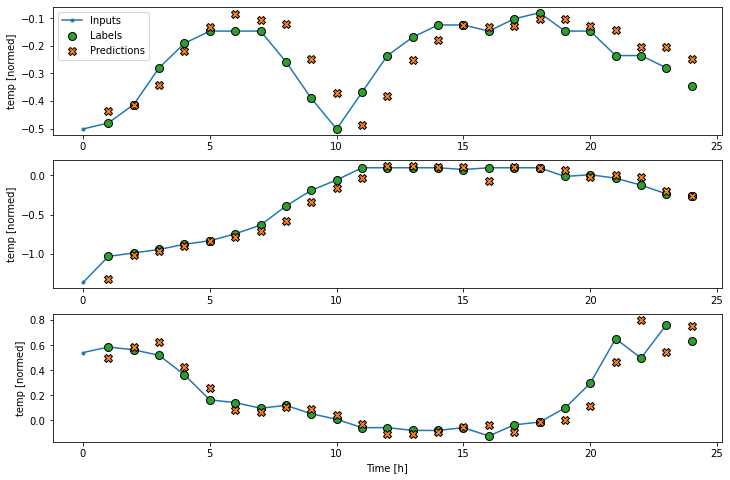

In [80]:
wide_window.plot(linear)

Linear models are more interpretable and can extract the weights of layers and visualize the weights assigned to each input:

# CA
The linear model can be called on batches of wide windows. Used this way the model makes a set of independent predictions on consecutive time steps. The time axis acts like another batch axis. There are no interactions between the predictions at each time step. Next, I use RNN to make predictions on the data.

### RNN

Long short-term memory network is a method of RNN. RNN can only have short-term memory due to the disappearance of gradient. LSTM network combines short-term memory and long-term memory through exquisite gate control, and solves the problem of gradient disappearance to a certain extent.  

In python we can use this network directly using LSTM.

In [81]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32,return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [82]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 15)
Output shape: (32, 24, 1)


In [83]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [84]:
history = compile_and_fit(lstm_model, wide_window)
IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

3355/3355 [==============================] - 13s 4ms/step - loss: 0.0153 - mean_absolute_error: 0.0876


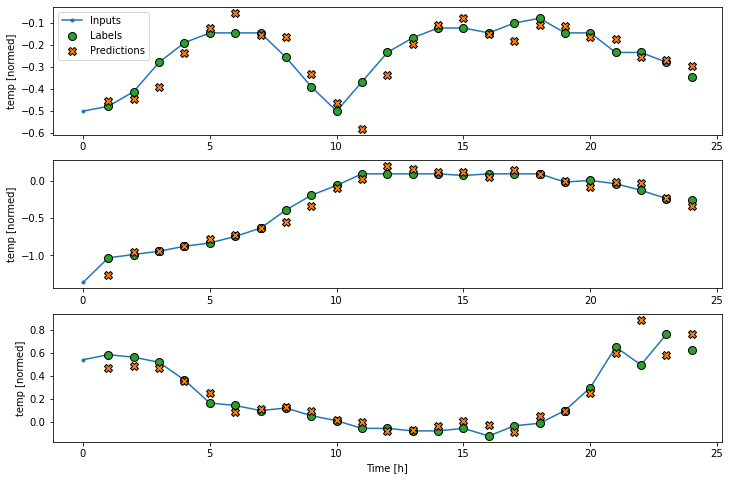

In [85]:
wide_window.plot(lstm_model)

Both linear models and RNNs predict a single output feature temp for a single time step.

Multiple features can be predicted by changing the number of units in the output layer and adjusting the training window to include all features in the labels.

In [86]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 15)
Labels shape (batch, time, features): (32, 24, 15)


The linear model can clearly observe that the sequence does not change drastically from time step to time step. This problem can be solved by careful initialization, which can help the model converge faster and obtain better guess results.

### Multiple time step predictions

In multi-step forecasting, the model needs to learn to predict a series of future values. Therefore, unlike a one-step model that only predicts a single future point, a multi-step model predicts a sequence of future values.

There are two rough ways to do this:

- A single forecast that forecasts the entire time series at once.
- Autoregressive prediction, where the model makes only one-step predictions and its output is fed back as input.


In here, we need to predict the weather after 48 hours, so I set OUT_STEPS to 48.

Total window size: 96
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label indices: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
Label column name(s): None

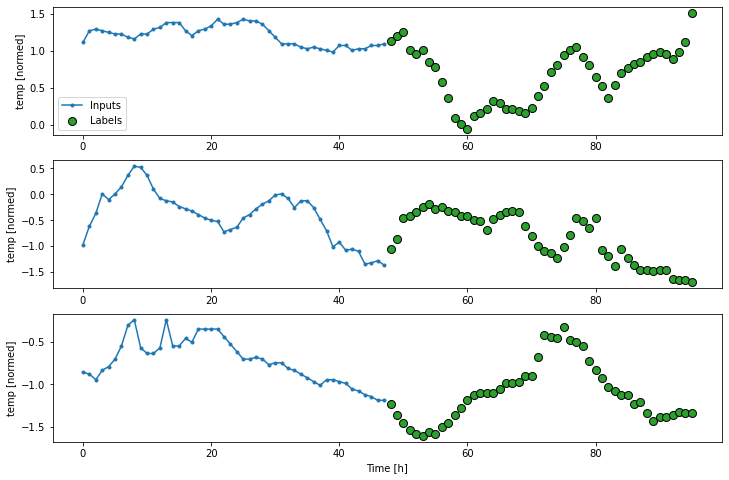

In [87]:
OUT_STEPS = 48
multi_window = WindowGenerator(input_width=48,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

A recurrent model can learn to use a long-term input history if it correlates with the predictions the model makes. Here, the model will accumulate 24 hours of internal state and then make one prediction for the next 48 hours.

In [88]:
multi_val_performance = {}
multi_performance = {}

3353/3353 [==============================] - 5s 2ms/step - loss: 0.7129 - mean_absolute_error: 0.6008


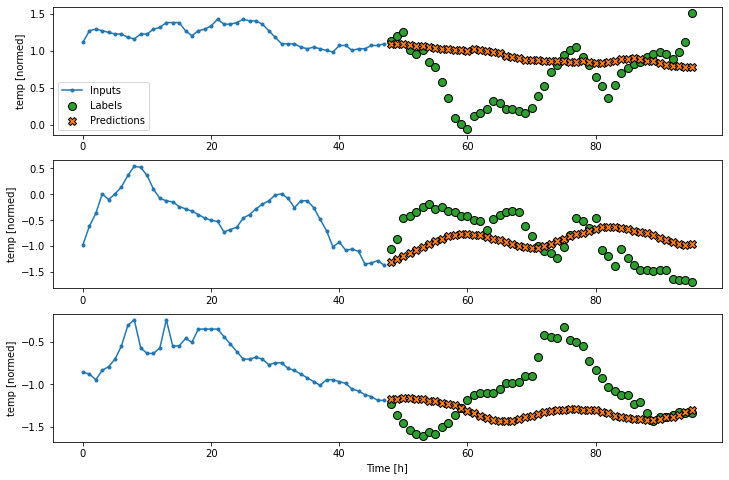

In [89]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

From the guessing results, we can see that the linear model has poor predictive ability for data. This is because as a neural network, the structure of the linear model is too simple to be applied to practical problems. Next, observe the training of the RNN neural network using LSTM. 

3353/3353 [==============================] - 20s 6ms/step - loss: 0.6104 - mean_absolute_error: 0.5479


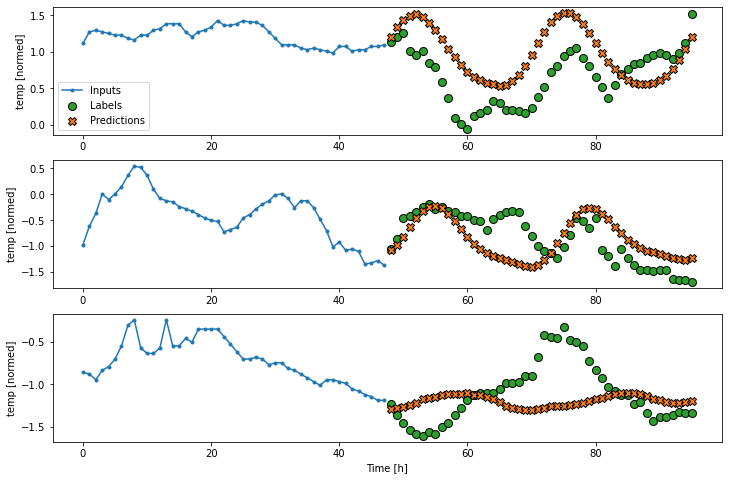

In [90]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)


# CA

What are the parameters which influence the prediction accuracy?

- 1 Data preprocessing, for some data missing values, taking the average or the minimum value may affect the accuracy of the model. It is worth noting that the data should be converted into a corresponding type such as floating point before training the model, otherwise it will be When NAN appears, I have no relevant processing when training the model, which will cause the gradient to disappear, that is, the loss is nan.  

- 2 Hyperparameter, learning rate, momentum, batch size and number of iterations all affect model accuracy.  


- 3 Features, the selection of different features or proper deletion of some useless features will also lead to different results in the model.  


- 4 Callbacks function, the early_stopping function is used in this model, which is the callbacks function used to stop training early. Stop training when the loss on the training set is no longer reduced, which can reduce training time, save performance, and reduce overfitting of the model, but the optimal solution may not be obtained.